## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

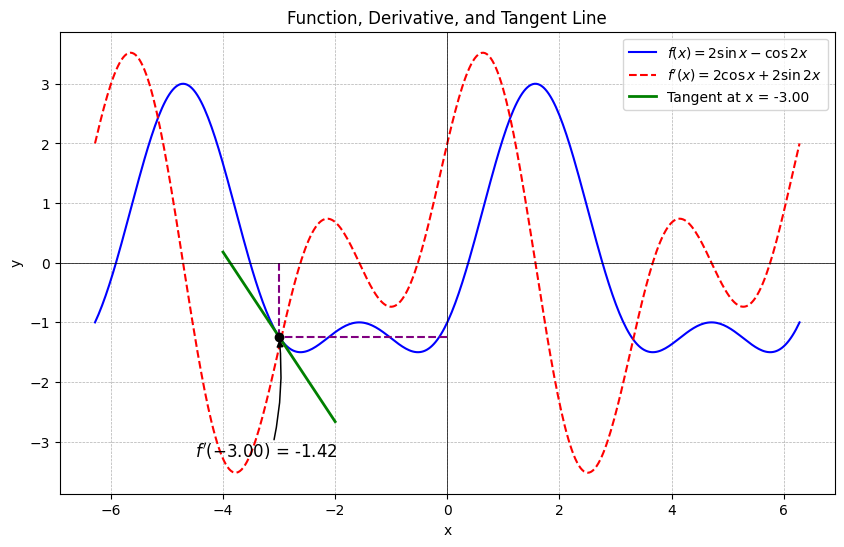

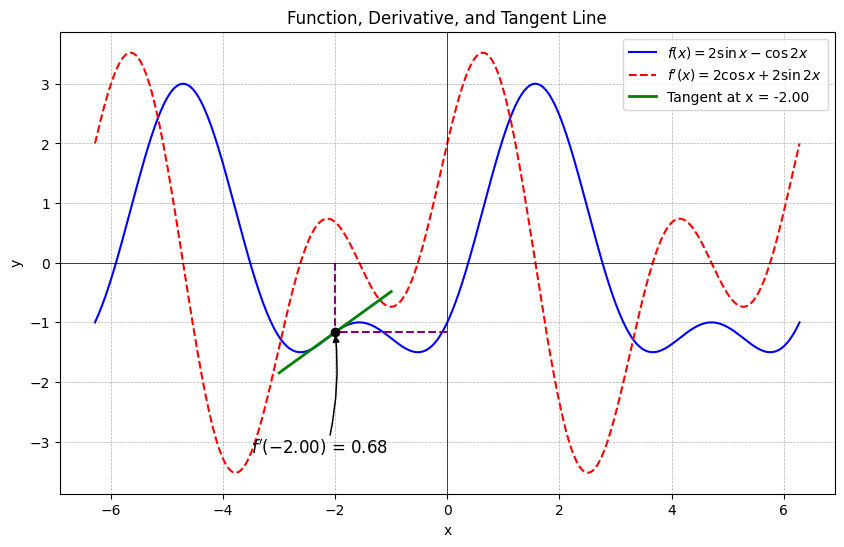

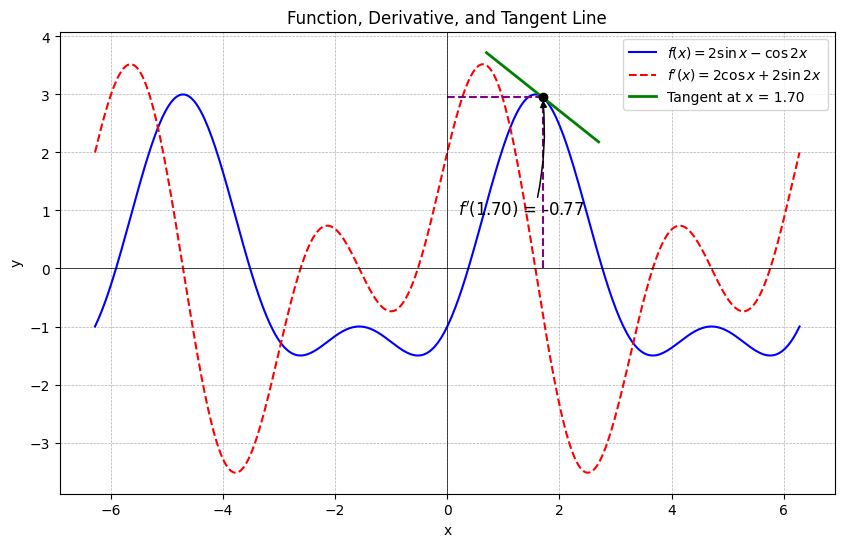

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

def df(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def tangent_line(x, x0, slope):
    return f(x0) + slope * (x - x0)

def beauty_derivative_plot(x0):
    x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
    y = f(x)
    y_deriv = df(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="$f(x) = 2\sin x - \cos 2x$", color='blue')
    plt.plot(x, y_deriv, label="$f'(x) = 2\cos x + 2\sin 2x$", color='red', linestyle='dashed')
    
    #Значение производной в точке
    slope_at_x0 = df(x0)
    
    #Рисуем касательную прямую в точке
    tangent_x = np.linspace(x0 - 1, x0 + 1, 100)
    tangent_y = tangent_line(tangent_x, x0, slope_at_x0)
    plt.plot(tangent_x, tangent_y, label=f"Tangent at x = {x0:.2f}", color='green', linewidth=2)
    
    #Отображаем точку касания
    plt.scatter([x0], [f(x0)], color='black', zorder=3)
    
    #Перпендикуляры на оси X и Y
    plt.plot([x0, x0], [0, f(x0)], color='purple', linestyle='dashed')  # Перпендикуляр на ось Y
    plt.plot([0, x0], [f(x0), f(x0)], color='purple', linestyle='dashed')  # Перпендикуляр на ось X
    
    #Добавляем стрелку
    arrow = FancyArrowPatch(
        (x0 - 0.1, f(x0) - 1.77),  #начало стрелки
        (x0, f(x0)),  #конец стрелки
        connectionstyle="arc3,rad=.08", 
        arrowstyle='-|>', 
        color='black',
        linewidth=1.1,
        mutation_scale=10,
        zorder=10
    )
    plt.gca().add_patch(arrow)
    
    #Добавляем надпись
    plt.text(x0 - 1.5, f(x0) - 1.74, f"$f'({x0:.2f})$ = {slope_at_x0:.2f}", fontsize=12, verticalalignment='top', horizontalalignment='left')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    #Легенда 
    plt.legend()
    
    #Заголовок и оформление
    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

#Пример
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("populations.txt")
years =data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]


- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

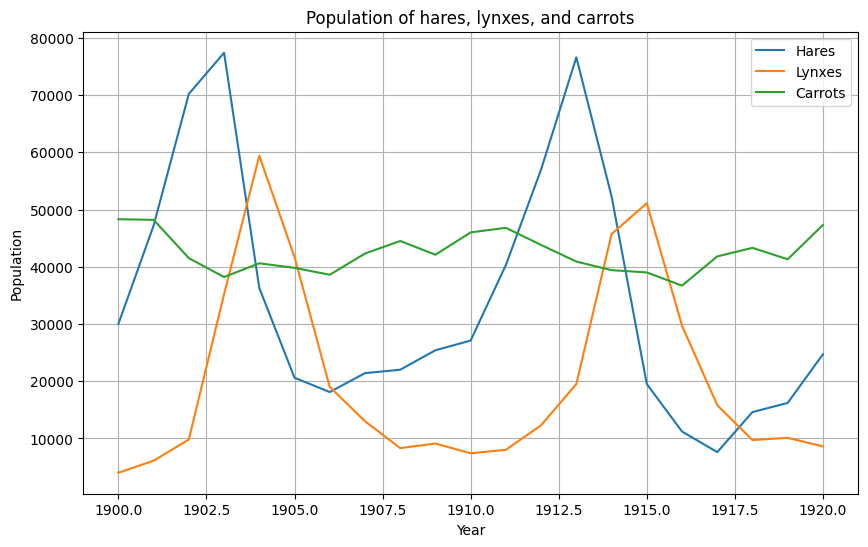

In [3]:
#Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')

#Добавление легенды
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of hares, lynxes, and carrots')
plt.grid(True)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

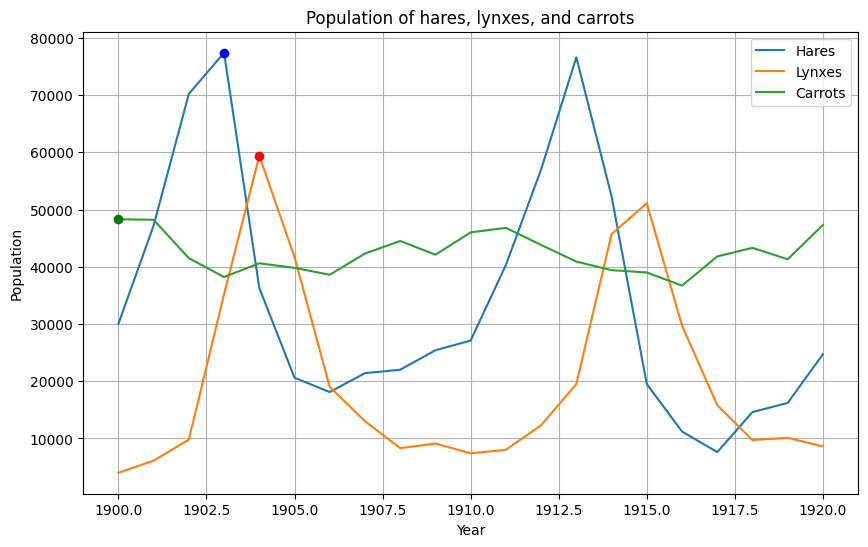

In [4]:
import matplotlib.pyplot as plt

#находим года с максимальной популяцией
max_hares_year = years[np.argmax(hares)]
max_lynxes_year = years[np.argmax(lynxes)]
max_carrots_year = years[np.argmax(carrots)]
#Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')

#отметка точек
plt.scatter(max_hares_year, max(hares), color='blue', zorder=5)
plt.scatter(max_lynxes_year, max(lynxes), color='red', zorder=5)
plt.scatter(max_carrots_year, max(carrots), color='green', zorder=5)

#Добавление легенды
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of hares, lynxes, and carrots')
plt.grid(True)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

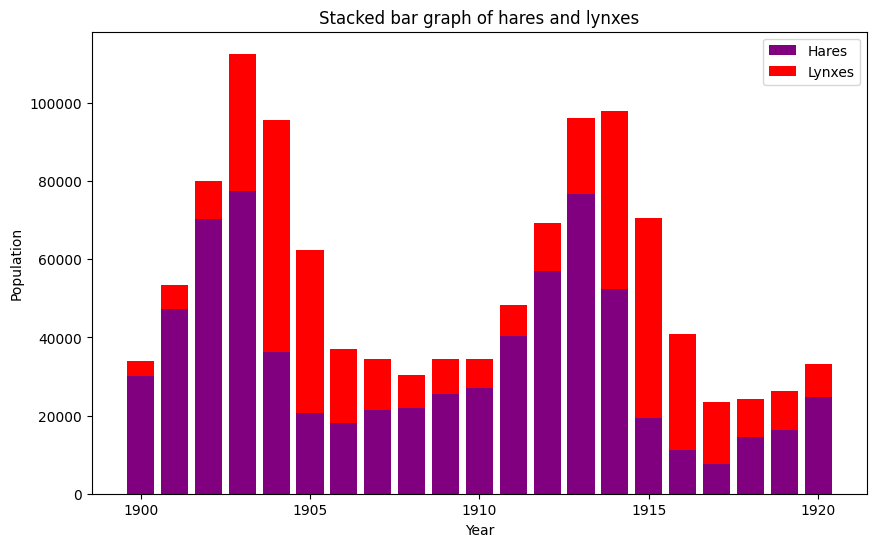

In [5]:
#Построение графика
plt.figure(figsize=(10, 6))
plt.bar(years, hares, label='Hares', color='purple')
plt.bar(years, lynxes, label='Lynxes', color='red', bottom=hares)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Stacked bar graph of hares and lynxes')
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

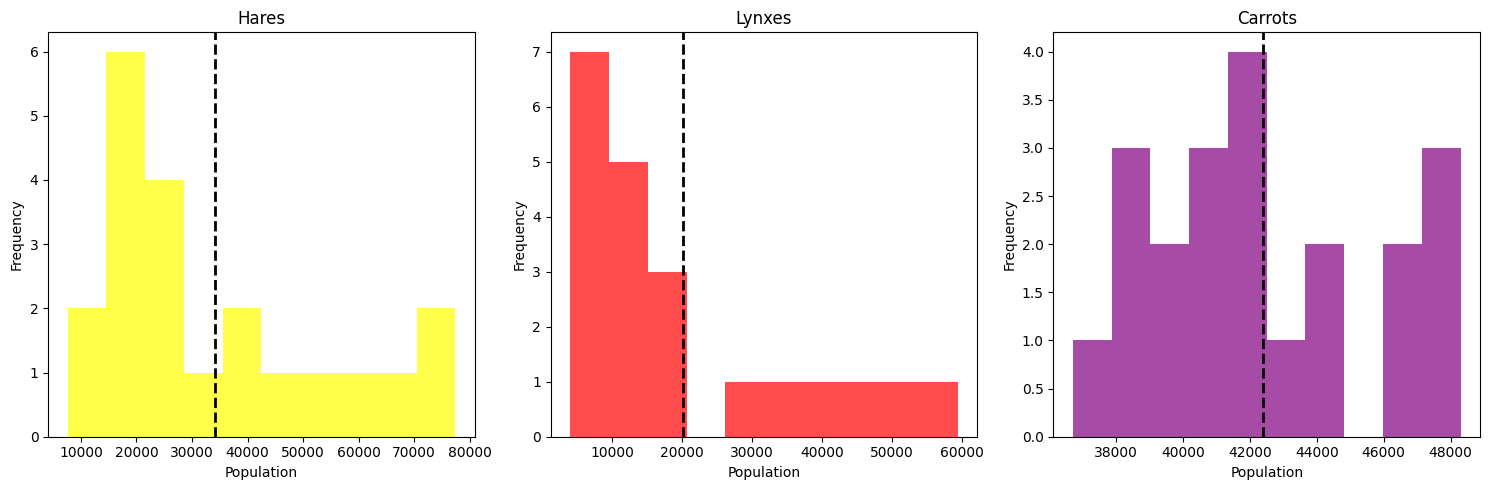

In [6]:
import numpy as np

#Средние значения
hares_mean = np.mean(hares)
lynxes_mean = np.mean(lynxes)
carrots_mean = np.mean(carrots)

#Построение гистограмм
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(hares, bins=10, color='yellow', alpha=0.7)
axes[0].axvline(hares_mean, color='black', linestyle='dashed', linewidth=2)
axes[0].set_title('Hares')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Frequency')

axes[1].hist(lynxes, bins=10, color='red', alpha=0.7)
axes[1].axvline(lynxes_mean, color='black', linestyle='dashed', linewidth=2)
axes[1].set_title('Lynxes')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Frequency')

axes[2].hist(carrots, bins=10, color='purple', alpha=0.7)
axes[2].axvline(carrots_mean, color='black', linestyle='dashed', linewidth=2)
axes[2].set_title('Carrots')
axes[2].set_xlabel('Population')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

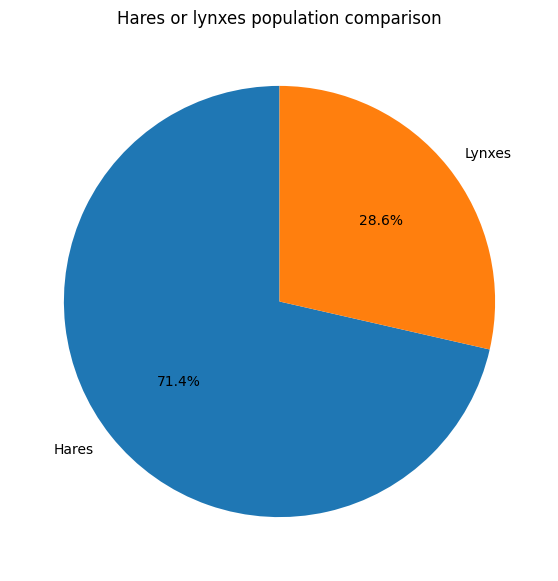

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


In [7]:
#Сравнение популяций за каждый год
population_comparison = ['H' if hares[i] > lynxes[i] else 'L' for i in range(len(years))]

plt.figure(figsize=(7, 7))
plt.pie([population_comparison.count('H'), population_comparison.count('L')],
        labels=['Hares', 'Lynxes'], autopct='%1.1f%%', startangle=90)
plt.title('Hares or lynxes population comparison')
plt.show()

print(population_comparison)

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

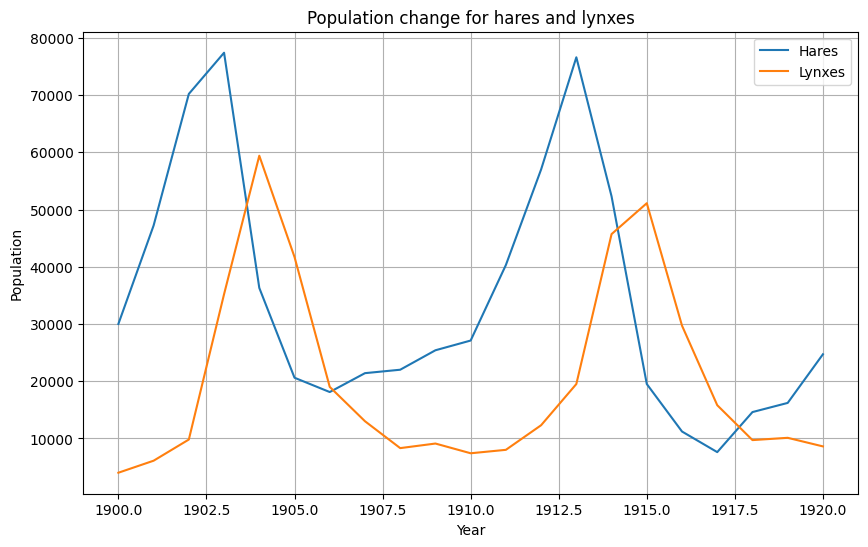

Correlation: 0.07189206073535571


In [8]:
#Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population change for hares and lynxes')
plt.legend()
plt.grid(True)
plt.show()

#Корреляция
correlation = np.corrcoef(hares, lynxes)[0, 1]
print(f"Correlation: {correlation}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

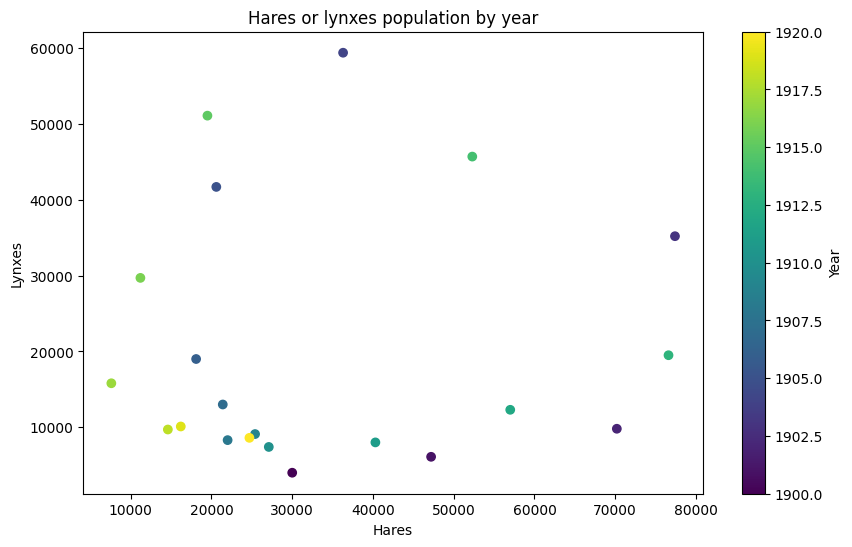

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(hares, lynxes, c=years, cmap='viridis')
plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.title('Hares or lynxes population by year')
plt.colorbar(label='Year')
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [11]:
from numpy.polynomial.polynomial import Polynomial

#Линейная регрессия для популяции зайцев
coeffs = np.polyfit(years, hares, 1)  #cтроим линейную модель
coeffs = coeffs[::-1]  #разворачиваем порядок коэффициентов
poly = Polynomial(coeffs)  #cоздаем полином

#Предсказываем значение для 1920 года
pred = poly(1920)

#Истинное значение
true = hares[-1]  #последний элемент массива (1920 год)

#Ошибка
error = abs(pred - true) / true

#Вывод
print(f"Predicted population in 1920: {pred:.2f}")
print(f"True population in 1920: {true:.2f}")
print(f"Error: {error:.3f}")

Predicted population in 1920: 20649.78
True population in 1920: 24700.00
Error: 0.164
